In [8]:

import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import argparse
import re


dat =np.fromfile('/home/mxi235/data/traceview/tracepoints.bin',dtype=np.float64).reshape(-1,1000,2)
# dat = dat[0:2000,:,:]



In [2]:
print(dat.shape)

(100, 1000, 2)


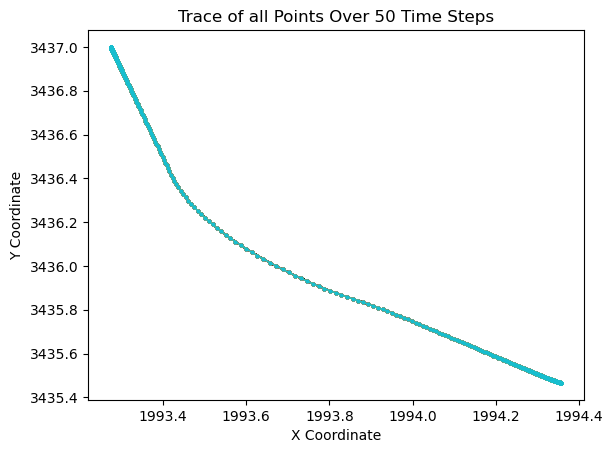

In [16]:

plt.figure()
#take 200th points
# data = dat[888:889,:,:]
data = dat[857:858,:,:]
# 循环遍历每个点的坐标轨迹
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data[i,j,0] == 0:
            break  
        x = data[i, :, 0]  # 获取第i个点的x坐标轨迹
        y = data[i, :, 1]  # 获取第i个点的y坐标轨迹
        plt.plot(x, y, marker='o', markersize=2, linewidth=1)

# 设置图形标题和坐标轴标签
plt.title('Trace of all Points Over 50 Time Steps')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# 显示图形
plt.show()

In [3]:
# .././test /home/mxi235/cpSZ/data/uf.dat /home/mxi235/cpSZ/data/vf.dat 3600 2400
# .././test /home/mxi235/cpSZ/data/uf.dat /home/mxi235/cpSZ/data/vf.dat 3600 2400 /home/mxi235/data/traceview/tracepoints.bin
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import argparse
import re


dat =np.fromfile('/home/mxi235/data/traceview/tracepoints.bin',dtype=np.float64).reshape(-1,1000,2)

import vtkmodules.all as vtk
import numpy as np

# 轨迹数据，假设为一个200x50x2的numpy数组
num_cp = dat.shape[0]
num_timestep = dat.shape[1]


# 创建一个vtkPoints对象来存储轨迹点的坐标
points = vtk.vtkPoints()

# 添加轨迹点的坐标到vtkPoints对象
for i in range(num_cp):
    for j in range(num_timestep):
        x = dat[i, j, 0]
        y = dat[i, j, 1]
        z = 0.0  # Z坐标，这里设为0
        points.InsertNextPoint(x, y, z)

# 创建vtkCellArray对象来定义轨迹线
lines = vtk.vtkCellArray()

# 添加轨迹线的连接信息
for i in range(num_cp):
    polyline = vtk.vtkPolyLine()
    for j in range(num_timestep):
        polyline.GetPointIds().InsertNextId(i * num_timestep + j)
    lines.InsertNextCell(polyline)

# 创建vtkPolyData对象，并将点和线添加到其中
polydata = vtk.vtkPolyData()
polydata.SetPoints(points)
polydata.SetLines(lines)


# 将vtkPolyData保存为VTK文件
writer = vtk.vtkPolyDataWriter()
writer.SetFileName("/home/mxi235/data/traceview/dat.vtk")
writer.SetInputData(polydata)
writer.Write()


1

In [20]:
dat.shape

# 52284/4 =13071
n = 8570
print(dat[n*4,0,:])
print(dat[n*4+1,0,:])
print(dat[n*4+2,0,:])
print(dat[n*4+3,0,:])
print("\n")
print(dat[n*4,100,:])
print(dat[n*4+1,300,:])
print(dat[n*4+2,300,:])
print(dat[n*4+3,300,:])

[3083.00952987  631.99696989]
[3082.99047013  632.00303011]
[3083.00650339  632.00759644]
[3082.99349661  631.99240356]


[3122.26539613  651.65949413]
[3276.76464279  710.73656925]
[3277.32271662  711.4511492 ]
[3278.38065206  713.09742207]


In [ ]:
# .././test /home/mxi235/cpSZ/data/uf.dat /home/mxi235/cpSZ/data/vf.dat 3600 2400
#.././test /home/mxi235/cpSZ/data/uf.dat /home/mxi235/cpSZ/data/vf.dat 3600 2400 /home/mxi235/data/traceview/tracepoints.bin
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import argparse
import re


dat =np.fromfile('/home/mxi235/data/traceview/tracepoints_out.bin',dtype=np.float64).reshape(-1,1000,2)

import vtkmodules.all as vtk
import numpy as np

# 轨迹数据，假设为一个200x50x2的numpy数组
num_cp = dat.shape[0]
num_timestep = dat.shape[1]


# 创建一个vtkPoints对象来存储轨迹点的坐标
points = vtk.vtkPoints()

# 添加轨迹点的坐标到vtkPoints对象
for i in range(num_cp):
    for j in range(num_timestep):
        x = dat[i, j, 0]
        y = dat[i, j, 1]
        z = 0.0  # Z坐标，这里设为0
        points.InsertNextPoint(x, y, z)

# 创建vtkCellArray对象来定义轨迹线
lines = vtk.vtkCellArray()

# 添加轨迹线的连接信息
for i in range(num_cp):
    polyline = vtk.vtkPolyLine()
    for j in range(num_timestep):
        polyline.GetPointIds().InsertNextId(i * num_timestep + j)
    lines.InsertNextCell(polyline)

# 创建vtkPolyData对象，并将点和线添加到其中
polydata = vtk.vtkPolyData()
polydata.SetPoints(points)
polydata.SetLines(lines)


# 将vtkPolyData保存为VTK文件
writer = vtk.vtkPolyDataWriter()
writer.SetFileName("/home/mxi235/data/traceview/dat.out.vtk")
writer.SetInputData(polydata)
writer.Write()
